**Predicción de Enfermedad Cardíaca**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset
df = pd.read_csv('heart_disease_uci.csv')

# Vista inicial de los datos
print(df.head())
print(df.info())

   id  age     sex    dataset               cp  trestbps   chol    fbs  \
0   1   63    Male  Cleveland   typical angina     145.0  233.0   True   
1   2   67    Male  Cleveland     asymptomatic     160.0  286.0  False   
2   3   67    Male  Cleveland     asymptomatic     120.0  229.0  False   
3   4   37    Male  Cleveland      non-anginal     130.0  250.0  False   
4   5   41  Female  Cleveland  atypical angina     130.0  204.0  False   

          restecg  thalch  exang  oldpeak        slope   ca  \
0  lv hypertrophy   150.0  False      2.3  downsloping  0.0   
1  lv hypertrophy   108.0   True      1.5         flat  3.0   
2  lv hypertrophy   129.0   True      2.6         flat  2.0   
3          normal   187.0  False      3.5  downsloping  0.0   
4  lv hypertrophy   172.0  False      1.4    upsloping  0.0   

                thal  num  
0       fixed defect    0  
1             normal    2  
2  reversable defect    1  
3             normal    0  
4             normal    0  
<class '

In [2]:
print(df.isnull().sum())

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64


In [3]:
# Convertir 'num' (0-4) en 'target' (0 o 1)
# 0 se queda como 0 (Sano)
# 1, 2, 3, 4 se convierten en 1 (Enfermo)
df['target'] = df['num'].apply(lambda x: 1 if x > 0 else 0)

# Ahora tenemos nuestra nueva columna 'target'
print(df['target'].value_counts())

target
1    509
0    411
Name: count, dtype: int64


In [4]:
# Filtramos para quedarnos solo con el dataset 'Cleveland', que es el más completo
df_clean = df[df['dataset'] == 'Cleveland'].copy()

# Ahora, vamos a revisar los nulos OTRA VEZ, pero solo de este subset
print("Valores nulos en el dataset de Cleveland:")
print(df_clean.isnull().sum())

Valores nulos en el dataset de Cleveland:
id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       1
ca          5
thal        3
num         0
target      0
dtype: int64


In [8]:
# 'id' is an identifier
# 'dataset' was used for filtering
# 'num' was replaced by 'target'
# Check which columns are in df_clean before dropping
columns_to_drop = ['id', 'dataset', 'num']
existing_columns_to_drop = [col for col in columns_to_drop if col in df_clean.columns]

df_clean = df_clean.drop(columns=existing_columns_to_drop)

In [9]:
df_clean = df_clean.dropna()

In [10]:
from sklearn.impute import SimpleImputer

# Seleccionamos las columnas con nulos (ej. 'ca' y 'thal')
cols_to_impute = ['ca', 'thal'] # Ajusta esto a lo que te muestre el .isnull().sum()

# Usamos la moda (most_frequent)
imputer = SimpleImputer(strategy='most_frequent')

# Aplicamos la imputación
df_clean[cols_to_impute] = imputer.fit_transform(df_clean[cols_to_impute])

# Verificación final
print("Nulos después de la imputación:")
print(df_clean.isnull().sum())

Nulos después de la imputación:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


/tmp/ipython-input-3120646290.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean[cols_to_impute] = imputer.fit_transform(df_clean[cols_to_impute])


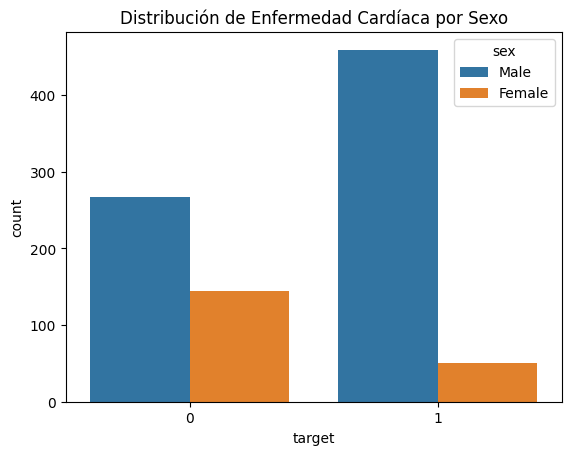

In [11]:
#¿Cómo se distribuye la enfermedad por sexo?
sns.countplot(x='target', hue='sex', data=df)
plt.title('Distribución de Enfermedad Cardíaca por Sexo')
plt.show()

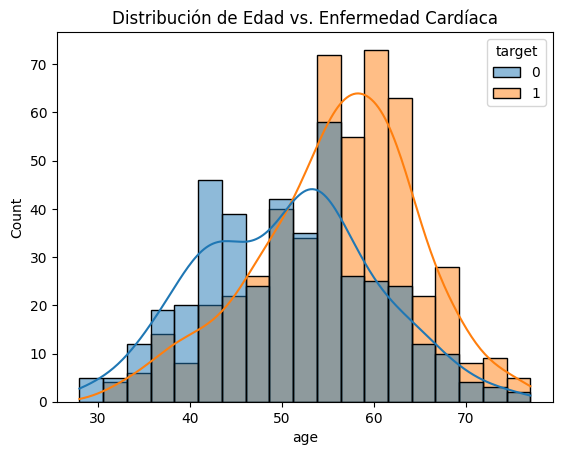

In [14]:
#¿Cómo se relaciona la edad con la enfermedad?
sns.histplot(data=df, x='age', hue='target', kde=True)
plt.title('Distribución de Edad vs. Enfermedad Cardíaca')
plt.show()

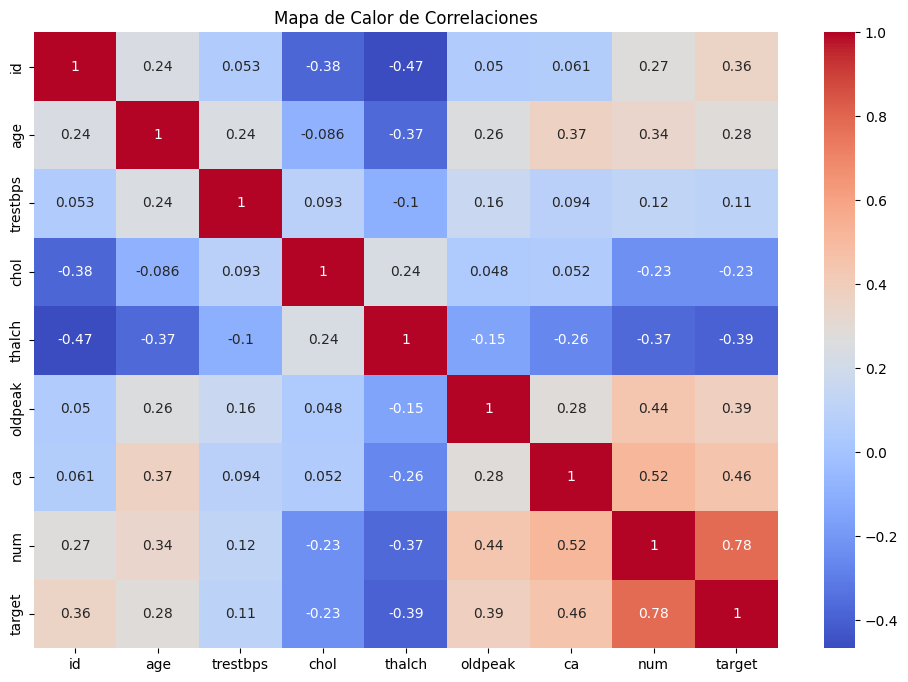

In [17]:
#¿Cuál es la correlación entre todas las variables?
# Select only numeric columns for correlation calculation
df_numeric = df.select_dtypes(include=np.number)

plt.figure(figsize=(12, 8))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm')
plt.title('Mapa de Calor de Correlaciones')
plt.show()

In [19]:
# Hacemos una copia para el modelado
df_model = df_clean.copy()

# Eliminamos las columnas que no son features
# 'id' es un identificador
# 'num' es la respuesta original (data leakage)
# Note: 'id' and 'num' were already dropped in previous steps when creating df_clean
columns_to_drop_model = [] # No need to drop 'id' or 'num' as they are not in df_clean

# Check which columns are in df_model before dropping
existing_columns_to_drop_model = [col for col in columns_to_drop_model if col in df_model.columns]


df_model = df_model.drop(columns=existing_columns_to_drop_model)

# Ahora sí, tu DataFrame df_model está listo para el Paso 3
print(df_model.head())

   age     sex               cp  trestbps   chol    fbs         restecg  \
0   63    Male   typical angina     145.0  233.0   True  lv hypertrophy   
1   67    Male     asymptomatic     160.0  286.0  False  lv hypertrophy   
2   67    Male     asymptomatic     120.0  229.0  False  lv hypertrophy   
3   37    Male      non-anginal     130.0  250.0  False          normal   
4   41  Female  atypical angina     130.0  204.0  False  lv hypertrophy   

   thalch  exang  oldpeak        slope   ca               thal  target  
0   150.0  False      2.3  downsloping  0.0       fixed defect       0  
1   108.0   True      1.5         flat  3.0             normal       1  
2   129.0   True      2.6         flat  2.0  reversable defect       1  
3   187.0  False      3.5  downsloping  0.0             normal       0  
4   172.0  False      1.4    upsloping  0.0             normal       0  


In [24]:
# Define features (X) and target (y) using the cleaned data
X = df_model.drop('target', axis=1)
y = df_model['target']

In [25]:
# Identify categorical columns for one-hot encoding
categorical_cols = X.select_dtypes(include='object').columns

# Apply one-hot encoding
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

In [26]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
from sklearn.preprocessing import StandardScaler

# Initialize and apply the scaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test) # Importante: solo .transform() en test


**Entrenamiento de Modelos**


In [28]:
from sklearn.linear_model import LogisticRegression

# Crear y entrenar el modelo
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

LogisticRegression()

In [29]:
from sklearn.ensemble import RandomForestClassifier

# Crear y entrenar el modelo
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

**Evaluación de Modelos**

In [30]:
y_pred_log = log_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)

In [31]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("--- Evaluación del Modelo de Regresión Logística ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_log):.4f}")
print(classification_report(y_test, y_pred_log))

print("\n--- Evaluación del Modelo Random Forest ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(classification_report(y_test, y_pred_rf))

--- Evaluación del Modelo de Regresión Logística ---
Accuracy: 0.8167
              precision    recall  f1-score   support

           0       0.88      0.81      0.84        36
           1       0.74      0.83      0.78        24

    accuracy                           0.82        60
   macro avg       0.81      0.82      0.81        60
weighted avg       0.82      0.82      0.82        60


--- Evaluación del Modelo Random Forest ---
Accuracy: 0.8667
              precision    recall  f1-score   support

           0       0.89      0.89      0.89        36
           1       0.83      0.83      0.83        24

    accuracy                           0.87        60
   macro avg       0.86      0.86      0.86        60
weighted avg       0.87      0.87      0.87        60



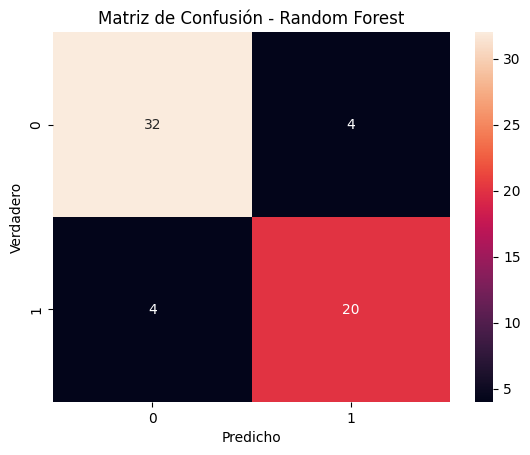

In [32]:
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='g')
plt.title('Matriz de Confusión - Random Forest')
plt.xlabel('Predicho')
plt.ylabel('Verdadero')
plt.show()